##실험 목표 : 내가 만든 가위바위보 사진을 학습해, 가위바위보를 분류할수있는 모델을 만들어보자

##실험 정보
데이터
- 훈련 데이터
          - 웹캠을 통해 직접찍은 왼손 가위바위보 사진 300장
          - 28X28로 resize, 이후 표준화 /225
- 테스트 데이터
          - 웹캠을 통해 직접찍은 오른손 가위바위보 사진 300장
###사용한 모델
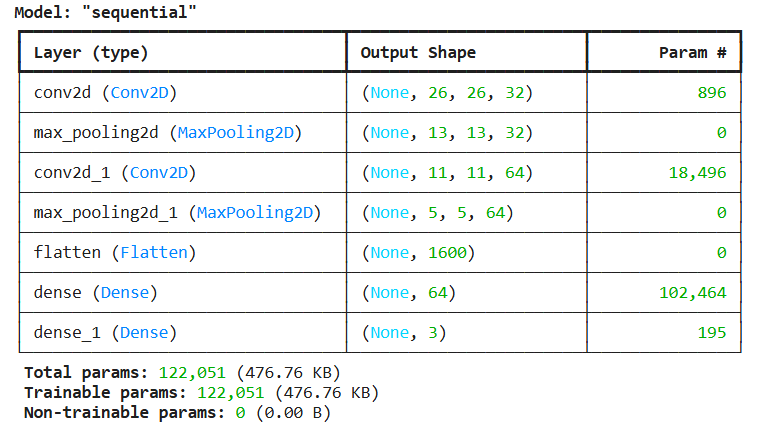

### 실험1 결과
검증 Loss: 3.78348, 검증 Accuracy: 0.157142

### 실험1 샘플링을 통한 결과 분석
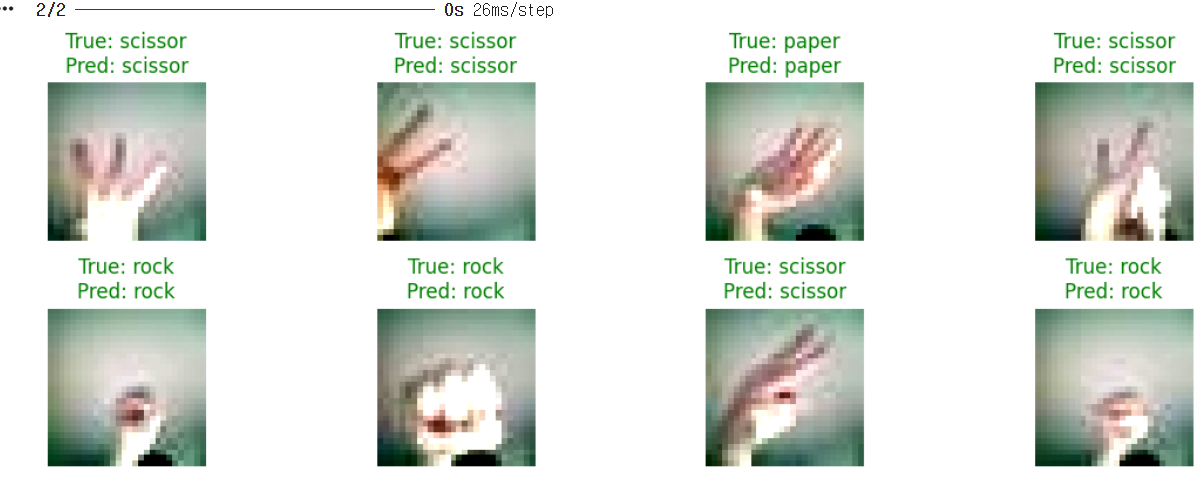

### 실험2(샘플균형, 명암비 향상) 결과
검증 Loss: 0.2499, 검증 Accuracy: 0.8833  
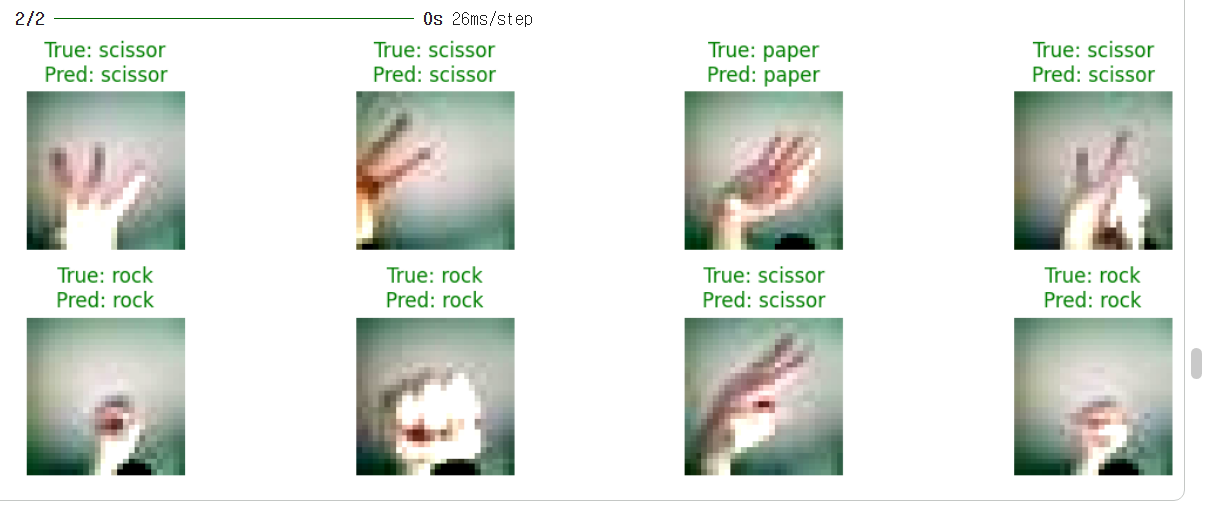

### 실험3 친구 데이터(source from kaggle) 실험 결과
최종 검증 Loss: 0.0989, 검증 Accuracy: 1.0000

### 종합비교 (실험 1,2,3)
- 실험1) 검증 Loss: 3.78348, 검증 Accuracy: 0.157142
- 실험2)검증 Loss: 0.2499, 검증 Accuracy: 0.8833
- 실험3) 최종 검증 Loss: 0.0989, 검증 Accuracy: 1.0000

### 회고
직접 촬영한 가위·바위·보 이미지를 전처리하고 CNN 모델을 설계하며 데이터 품질이 성능을 결정한다는 사실을 배웠다.

Dropout, 명암 보정, 클래스 균형 맞추기 등을 통해 과적합을 해결하며 모델 성능을 검증 지표로 개선할 수 있었다.

실제 친구 사진에서 오류가 발생하면서 다양한 환경의 데이터 확보와 일반화 능력의 중요성을 깨달았다.


### next :

- 1. 데이터 종류와 갯수에 맞는 모델링 파라미터값 시뮬레이션이 가능하지 않을까?
- 2. 모델링 결과 평가 지표를 확인해볼 필요가 있을 것 같다. (최종 결론은 text 니까)

In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.19.0
2.0.2


In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!unzip "/content/drive/MyDrive/SQL_modu/1201_DL/paper/paper.zip" -d "/content/drive/MyDrive/SQL_modu/1201_DL/paper/"
!unzip "/content/drive/MyDrive/SQL_modu/1201_DL/rock/rock.zip" -d "/content/drive/MyDrive/SQL_modu/1201_DL/rock/"
!unzip "/content/drive/MyDrive/SQL_modu/1201_DL/scissor/scissor.zip" -d "/content/drive/MyDrive/SQL_modu/1201_DL/scissor/"


Archive:  /content/drive/MyDrive/SQL_modu/1201_DL/paper/paper.zip
 extracting: /content/drive/MyDrive/SQL_modu/1201_DL/paper/0.jpg  
 extracting: /content/drive/MyDrive/SQL_modu/1201_DL/paper/1.jpg  
 extracting: /content/drive/MyDrive/SQL_modu/1201_DL/paper/2.jpg  
 extracting: /content/drive/MyDrive/SQL_modu/1201_DL/paper/3.jpg  
 extracting: /content/drive/MyDrive/SQL_modu/1201_DL/paper/4.jpg  
 extracting: /content/drive/MyDrive/SQL_modu/1201_DL/paper/5.jpg  
 extracting: /content/drive/MyDrive/SQL_modu/1201_DL/paper/6.jpg  
 extracting: /content/drive/MyDrive/SQL_modu/1201_DL/paper/7.jpg  
 extracting: /content/drive/MyDrive/SQL_modu/1201_DL/paper/8.jpg  
 extracting: /content/drive/MyDrive/SQL_modu/1201_DL/paper/9.jpg  
 extracting: /content/drive/MyDrive/SQL_modu/1201_DL/paper/10.jpg  
 extracting: /content/drive/MyDrive/SQL_modu/1201_DL/paper/11.jpg  
 extracting: /content/drive/MyDrive/SQL_modu/1201_DL/paper/12.jpg  
 extracting: /content/drive/MyDrive/SQL_modu/1201_DL/paper/1

In [11]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [14]:
import glob
import os
from PIL import Image

def resize_images(img_dir):
    images = glob.glob(os.path.join(img_dir, "*.jpg"))
    print(f"[{img_dir}] → {len(images)} images to be resized.")

    target_size = (28, 28)

    for img_path in images:
        with Image.open(img_path) as old_img:
            new_img = old_img.resize(target_size, Image.Resampling.LANCZOS)
            new_img.save(img_path, "JPEG")

    print(f"[{img_dir}] → {len(images)} images resized.")


# 각 폴더를 따로 호출
scissor_dir = "/content/drive/MyDrive/SQL_modu/1201_DL/scissor"
rock_dir    = "/content/drive/MyDrive/SQL_modu/1201_DL/rock"
paper_dir   = "/content/drive/MyDrive/SQL_modu/1201_DL/paper"

resize_images(scissor_dir)
resize_images(rock_dir)
resize_images(paper_dir)

print("가위 / 바위 / 보 이미지 리사이즈 완료!")

[/content/drive/MyDrive/SQL_modu/1201_DL/scissor] → 145 images to be resized.
[/content/drive/MyDrive/SQL_modu/1201_DL/scissor] → 145 images resized.
[/content/drive/MyDrive/SQL_modu/1201_DL/rock] → 101 images to be resized.
[/content/drive/MyDrive/SQL_modu/1201_DL/rock] → 101 images resized.
[/content/drive/MyDrive/SQL_modu/1201_DL/paper] → 103 images to be resized.
[/content/drive/MyDrive/SQL_modu/1201_DL/paper] → 103 images resized.
가위 / 바위 / 보 이미지 리사이즈 완료!


In [15]:
import os
import glob

def count_images(img_dir, exts=("jpg", "jpeg", "png")):
    count = 0
    for ext in exts:
        pattern = os.path.join(img_dir, f"*.{ext}")
        count += len(glob.glob(pattern))
    print(f"[{img_dir}] 이미지 개수: {count}")
    return count

# 폴더 경로
scissor_dir = "/content/drive/MyDrive/SQL_modu/1201_DL/scissor"
rock_dir    = "/content/drive/MyDrive/SQL_modu/1201_DL/rock"
paper_dir   = "/content/drive/MyDrive/SQL_modu/1201_DL/paper"

# 각 폴더 이미지 개수 출력
count_scissor = count_images(scissor_dir)
count_rock    = count_images(rock_dir)
count_paper   = count_images(paper_dir)

print("\n요약:")
print(f"가위 이미지 수 : {count_scissor}")
print(f"바위 이미지 수 : {count_rock}")
print(f"보   이미지 수 : {count_paper}")
print(f"총 이미지 수   : {count_scissor + count_rock + count_paper}")


[/content/drive/MyDrive/SQL_modu/1201_DL/scissor] 이미지 개수: 145
[/content/drive/MyDrive/SQL_modu/1201_DL/rock] 이미지 개수: 101
[/content/drive/MyDrive/SQL_modu/1201_DL/paper] 이미지 개수: 103

요약:
가위 이미지 수 : 145
바위 이미지 수 : 101
보   이미지 수 : 103
총 이미지 수   : 349


In [16]:
import os
import glob
import numpy as np
from PIL import Image

def load_data(base_dir):
    # base_dir 아래에 scissor / rock / paper 폴더가 있다고 가정
    scissor_files = glob.glob(os.path.join(base_dir, "scissor", "*.jpg"))
    rock_files    = glob.glob(os.path.join(base_dir, "rock", "*.jpg"))
    paper_files   = glob.glob(os.path.join(base_dir, "paper", "*.jpg"))

    # 총 데이터 개수 자동 계산
    number_of_data = len(scissor_files) + len(rock_files) + len(paper_files)

    print("총 이미지 개수:", number_of_data)
    print(f"  가위: {len(scissor_files)}, 바위: {len(rock_files)}, 보: {len(paper_files)}")

    img_size = 28   # 리사이즈 해둔 크기
    color    = 3    # RGB

    # 이미지와 라벨을 담을 배열 생성
    imgs   = np.zeros((number_of_data, img_size, img_size, color), dtype=np.int32) # 딥러닝에서 많이 씀
    labels = np.zeros((number_of_data,), dtype=np.int32)

    idx = 0

    # 가위 : label 0
    for file in scissor_files:
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img
        labels[idx] = 0
        idx += 1

    # 바위 : label 1
    for file in rock_files:
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img
        labels[idx] = 1
        idx += 1

    # 보 : label 2
    for file in paper_files:
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img
        labels[idx] = 2
        idx += 1

    print("학습데이터(x_train)의 실제 이미지 개수는", idx, "입니다.")
    return imgs, labels


# Nicole 경로에 맞게 base_dir 설정
image_dir_path = "/content/drive/MyDrive/SQL_modu/1201_DL"

x_train, y_train = load_data(image_dir_path)

# 0~255 → 0~1 정규화 (float32로 캐스팅 권장)
x_train_norm = x_train.astype("float32") / 255.0

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))


총 이미지 개수: 349
  가위: 145, 바위: 101, 보: 103
학습데이터(x_train)의 실제 이미지 개수는 349 입니다.
x_train shape: (349, 28, 28, 3)
y_train shape: (349,)


라벨:  0


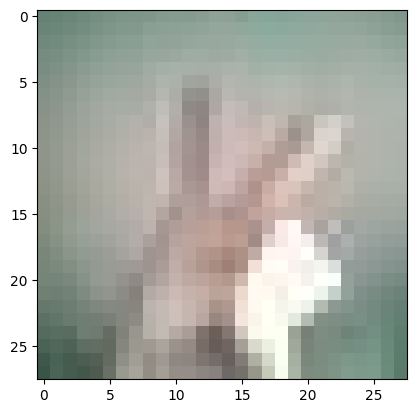

In [17]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

딥러닝 네트워크 설계하기

가위바위보 딥러닝 설계하기

In [19]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?

# 1) Sequential 모델 객체 생성
model = keras.models.Sequential()

# 2) 첫 번째 합성곱 층(Conv2D) + 풀링(MaxPooling)
#    - 3x3 필터 32개
#    - 입력 크기: 28x28x3 (컬러 이미지)
model.add(keras.layers.Conv2D(
    32, (3, 3),
    activation='relu',
    input_shape=(28, 28, 3)
))
model.add(keras.layers.MaxPooling2D((2, 2)))

# 3) 두 번째 합성곱 층 + 풀링
#    - 3x3 필터 64개
model.add(keras.layers.Conv2D(
    64, (3, 3),
    activation='relu'
))
model.add(keras.layers.MaxPooling2D((2, 2)))

# 4) 2차원 feature map을 1차원 벡터로 펼치기
model.add(keras.layers.Flatten())

# 5) 완전연결(Dense) 은닉층
#    - 뉴런 64개, 활성함수 ReLU
model.add(keras.layers.Dense(64, activation='relu'))

# 6) 출력층
#    - 클래스 3개 (가위, 바위, 보)
#    - softmax로 각 클래스에 대한 확률 출력
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,051 (476.76 KB)

 Trainable params: 122,051 (476.76 KB)

 Non-trainable params: 0 (0.00 B)

딥러닝 네트워크 학습시키기

In [21]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.

# 1) 모델 학습 방법 설정 (컴파일)
#    - optimizer: 가중치를 어떻게 업데이트할지 (Adam: 기본으로 많이 쓰는 옵티마이저)
#    - loss: 다중 클래스 분류에서, 레이블이 0/1/2처럼 정수일 때 사용하는 손실 함수
#    - metrics: 학습 중에 함께 보고 싶은 지표 (accuracy = 정확도)

model.compile(
    optimizer='adam',                         # 가중치 업데이트 방법
    loss='sparse_categorical_crossentropy',   # 정수 레이블 다중분류
    metrics=['accuracy']                      # 정확도 추적
)
# 2) 모델 학습 실행
#    - x_train_norm: 0~1로 정규화된 학습 이미지 데이터 (shape: (N, 28, 28, 3))
#    - y_train: 정답 레이블 (0=가위, 1=바위, 2=보)
#    - epochs: 전체 데이터를 몇 번 반복해서 학습할지
#    - batch_size: 한 번에 몇 개씩 묶어서 학습할지
#    - validation_split: 학습 데이터의 일부를 검증용으로 떼어서 성능을 함께 확인

history = model.fit(
    x_train_norm,     # 정규화된 이미지 데이터
    y_train,          # 정답 레이블 0/1/2
    epochs=20,        # 전체 데이터를 20번 반복 학습
    batch_size=32,    # 한 번에 32장씩 묶어서 학습
    validation_split=0.2,   # 학습 데이터의 20%를 검증용으로 사용
    verbose=2
)


# 3) 학습 결과 출력
print("\n=== 최종 학습 결과 ===")
print(f"Train Accuracy : {history.history['accuracy'][-1]}")
print(f"Train Loss     : {history.history['loss'][-1]}")
print(f"Val Accuracy   : {history.history['val_accuracy'][-1]}")
print(f"Val Loss       : {history.history['val_loss'][-1]}")

Epoch 1/20
9/9 - 3s - 324ms/step - accuracy: 0.8638 - loss: 0.3101 - val_accuracy: 0.0000e+00 - val_loss: 3.6173
Epoch 2/20
9/9 - 1s - 64ms/step - accuracy: 0.8889 - loss: 0.2825 - val_accuracy: 0.2571 - val_loss: 2.5258
Epoch 3/20
9/9 - 1s - 59ms/step - accuracy: 0.9211 - loss: 0.2201 - val_accuracy: 0.0286 - val_loss: 4.0021
Epoch 4/20
9/9 - 0s - 39ms/step - accuracy: 0.9498 - loss: 0.1923 - val_accuracy: 0.2571 - val_loss: 2.8663
Epoch 5/20
9/9 - 0s - 42ms/step - accuracy: 0.9749 - loss: 0.1571 - val_accuracy: 0.0429 - val_loss: 4.2538
Epoch 6/20
9/9 - 1s - 71ms/step - accuracy: 0.9785 - loss: 0.1373 - val_accuracy: 0.2571 - val_loss: 2.6950
Epoch 7/20
9/9 - 0s - 54ms/step - accuracy: 0.9821 - loss: 0.1409 - val_accuracy: 0.1286 - val_loss: 3.2084
Epoch 8/20
9/9 - 0s - 54ms/step - accuracy: 0.9606 - loss: 0.1479 - val_accuracy: 0.2143 - val_loss: 3.6439
Epoch 9/20
9/9 - 0s - 37ms/step - accuracy: 0.9857 - loss: 0.1000 - val_accuracy: 0.1429 - val_loss: 3.7366
Epoch 10/20
9/9 - 0s - 

In [ ]:
"""
//

“학습 데이터는 거의 다 외웠는데, 검증 데이터는 완전 못 맞추는 상태”
→ 심한 오버피팅 or 데이터 쪽 문제

Train acc ≈ 98%
Val acc ≈ 15% (3클래스 랜덤이면 33% 정도 → 그것보다도 낮음)
Val loss ≈ 3.78 → 모델이 검증셋에서 거의 엉뚱한 확률을 뱉고 있다는 뜻

버그가 없는지 한 번 훑어보고
그 다음에 오버피팅 줄이는 방향으로
"""

In [22]:
# 클래스 분포 확인
import numpy as np

unique, counts = np.unique(y_train, return_counts=True)
print("학습 데이터 레이블 분포:", dict(zip(unique, counts)))


학습 데이터 레이블 분포: {np.int32(0): np.int64(145), np.int32(1): np.int64(101), np.int32(2): np.int64(103)}


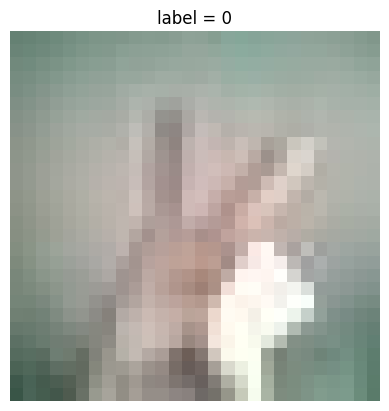

In [23]:
import matplotlib.pyplot as plt

idx = 0
plt.imshow(x_train_norm[idx])
plt.title(f"label = {y_train[idx]}")
plt.axis("off")
plt.show()


//
원인
- 1. 이미지 갯수 불균형 - 가위145바위101보104
- 2. 이미지 해상도 너무 적음 - 너무 적은 정보

실험2

- 1. 이미지 100개 고정으로 불러오고
- 2. 이미지 명암차이를 높여서
- 3. 다시 학습

1) 랜덤 샘플링 + 명암 강화 + 로딩 함수

In [ ]:
베이스 경로 설정

In [27]:
base_dir = "/content/drive/MyDrive/SQL_modu/1201_DL"

랜덤 100장 + 명암 강화해서 불러오기

In [28]:
x_data, y_data = load_data_with_sampling(
    base_dir=base_dir,
    per_class=100,      # 각 클래스 최대 100장
    img_size=28,        # 28x28로 리사이즈
    contrast_factor=1.8 # 명암 1.8배
)

print("x_data shape:", x_data.shape)
print("y_data shape:", y_data.shape)


scissor 선택된 이미지 수: 100
rock 선택된 이미지 수: 100
paper 선택된 이미지 수: 100
총 사용 이미지 수: 300
x_data shape: (300, 28, 28, 3)
y_data shape: (300,)


In [29]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(
    x_data, y_data,
    test_size=0.2,
    random_state=42,
    stratify=y_data
)

model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(x_val, y_val),
    verbose=2
)

val_loss, val_acc = model.evaluate(x_val, y_val, verbose=2)
print(f"검증 Loss: {val_loss:.4f}, 검증 Accuracy: {val_acc:.4f}")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
8/8 - 3s - 342ms/step - accuracy: 0.4000 - loss: 1.1190 - val_accuracy: 0.3333 - val_loss: 1.0952
Epoch 2/30
8/8 - 1s - 93ms/step - accuracy: 0.3417 - loss: 1.1090 - val_accuracy: 0.3667 - val_loss: 1.0837
Epoch 3/30
8/8 - 1s - 171ms/step - accuracy: 0.4292 - loss: 1.0755 - val_accuracy: 0.4833 - val_loss: 1.0673
Epoch 4/30
8/8 - 1s - 129ms/step - accuracy: 0.4917 - loss: 1.0452 - val_accuracy: 0.5000 - val_loss: 1.0501
Epoch 5/30
8/8 - 1s - 64ms/step - accuracy: 0.4792 - loss: 1.0372 - val_accuracy: 0.5333 - val_loss: 1.0160
Epoch 6/30
8/8 - 0s - 60ms/step - accuracy: 0.4792 - loss: 1.0275 - val_accuracy: 0.5500 - val_loss: 1.0032
Epoch 7/30
8/8 - 1s - 66ms/step - accuracy: 0.5375 - loss: 0.9708 - val_accuracy: 0.6167 - val_loss: 0.9606
Epoch 8/30
8/8 - 0s - 61ms/step - accuracy: 0.6125 - loss: 0.9181 - val_accuracy: 0.6333 - val_loss: 0.9099
Epoch 9/30
8/8 - 1s - 67ms/step - accuracy: 0.6375 - loss: 0.8869 - val_accuracy: 0.4667 - val_loss: 0.9155
Epoch 10/30
8/8 - 0s - 57

처음에는 데이터 불균형 + 저해상도 + 흐린 이미지 때문에
train 0.98 / val 0.15의 심한 오버피팅 발생


개선 사항:

- 클래스별로 100장씩 랜덤 샘플링 → 클래스 균형 확보
- 명암 강화(contrast_factor=1.8) → 형태 정보 선명화
- 간단한 CNN(Conv–Pool 2층 + Dense 64 + Dropout)으로 재학습

결과:
- 검증 정확도 0.8833, 검증 손실 0.2499로 크게 개선

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


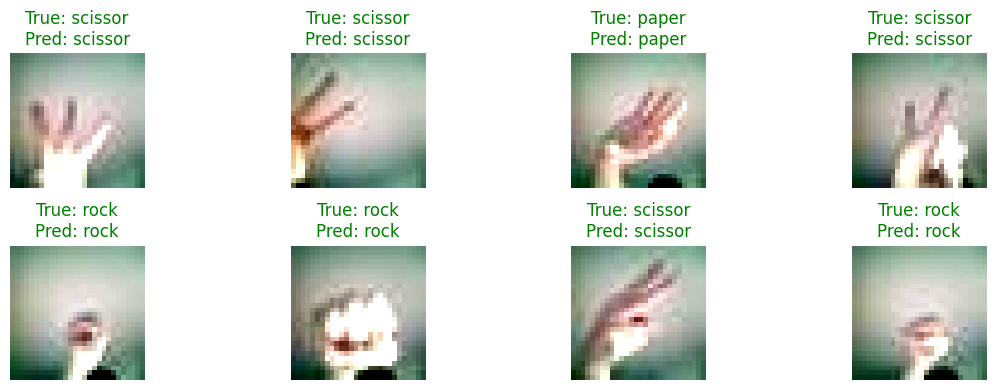

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# 검증 데이터 예측
y_pred_proba = model.predict(x_val)
y_pred = np.argmax(y_pred_proba, axis=1)

# 전체 중에서 랜덤으로 n개 뽑기
n_show = 8
rand_idx = np.random.choice(len(x_val), size=n_show, replace=False)

plt.figure(figsize=(12, 4))
for i, idx in enumerate(rand_idx):
    plt.subplot(2, n_show//2, i+1)
    plt.imshow(x_val[idx])
    true_label = class_names[int(y_val[idx])]
    pred_label = class_names[int(y_pred[idx])]

    # 맞으면 초록, 틀리면 빨강 (지금은 거의 다 초록일 것)
    color = "green" if true_label == pred_label else "red"
    plt.title(f"True: {true_label}\nPred: {pred_label}", color=color)
    plt.axis("off")

plt.tight_layout()
plt.show()


모델 함수 만들기 + EarlyStopping 설정

In [31]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

# 라벨 숫자 → 글자 이름 매핑
class_names = ['scissor', 'rock', 'paper']

# Dropout 값을 바꿔가며 같은 구조의 모델을 만들기 위한 함수
def build_model(dropout_rate=0.5):
    model = keras.models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(dropout_rate),          # ★ 여기만 값 바꿔가며 실험
        layers.Dense(3, activation='softmax')  # 가위/바위/보 3클래스
    ])
    return model

# EarlyStopping: val_loss가 5epoch 동안 좋아지지 않으면 중단
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)


Dropout 0.5 / 0.4 / 0.3 세 가지 학습해 보기

In [32]:
dropout_list = [0.5, 0.4, 0.3]

results = {}   # dropout 값별 성능 저장용 (val_loss, val_acc)
histories = {} # dropout 값별 history 저장용
models = {}    # 학습된 모델 저장용

for dr in dropout_list:
    print(f"\n===== Dropout = {dr} 로 학습 시작 =====")

    model = build_model(dropout_rate=dr)
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(
        x_train, y_train,
        epochs=40,              # 30 → 40으로 늘려두고
        batch_size=32,
        validation_data=(x_val, y_val),
        callbacks=[early_stop], # ★ val_loss 기준으로 조기 종료
        verbose=2
    )

    val_loss, val_acc = model.evaluate(x_val, y_val, verbose=0)
    print(f"Dropout={dr} → val_loss={val_loss:.4f}, val_acc={val_acc:.4f}")

    results[dr] = (val_loss, val_acc)
    histories[dr] = history
    models[dr] = model

print("\n=== Dropout 실험 결과 요약 ===")
for dr, (vl, va) in results.items():
    print(f"Dropout={dr}: val_loss={vl:.4f}, val_acc={va:.4f}")



===== Dropout = 0.5 로 학습 시작 =====
Epoch 1/40
8/8 - 2s - 309ms/step - accuracy: 0.3375 - loss: 1.1137 - val_accuracy: 0.3500 - val_loss: 1.0948
Epoch 2/40
8/8 - 0s - 40ms/step - accuracy: 0.3875 - loss: 1.0877 - val_accuracy: 0.3333 - val_loss: 1.0943
Epoch 3/40
8/8 - 0s - 38ms/step - accuracy: 0.3417 - loss: 1.0909 - val_accuracy: 0.4833 - val_loss: 1.0827
Epoch 4/40
8/8 - 0s - 38ms/step - accuracy: 0.4750 - loss: 1.0670 - val_accuracy: 0.4167 - val_loss: 1.0675
Epoch 5/40
8/8 - 0s - 38ms/step - accuracy: 0.5458 - loss: 1.0352 - val_accuracy: 0.6167 - val_loss: 1.0450
Epoch 6/40
8/8 - 1s - 77ms/step - accuracy: 0.5167 - loss: 1.0066 - val_accuracy: 0.5167 - val_loss: 1.0399
Epoch 7/40
8/8 - 0s - 38ms/step - accuracy: 0.5417 - loss: 0.9725 - val_accuracy: 0.4333 - val_loss: 0.9764
Epoch 8/40
8/8 - 0s - 41ms/step - accuracy: 0.6167 - loss: 0.8653 - val_accuracy: 0.6667 - val_loss: 0.9273
Epoch 9/40
8/8 - 0s - 39ms/step - accuracy: 0.5917 - loss: 0.8907 - val_accuracy: 0.6000 - val_loss:


가장 성능 좋은 Dropout = 0.5, 성능 = (0.07975880056619644, 1.0)


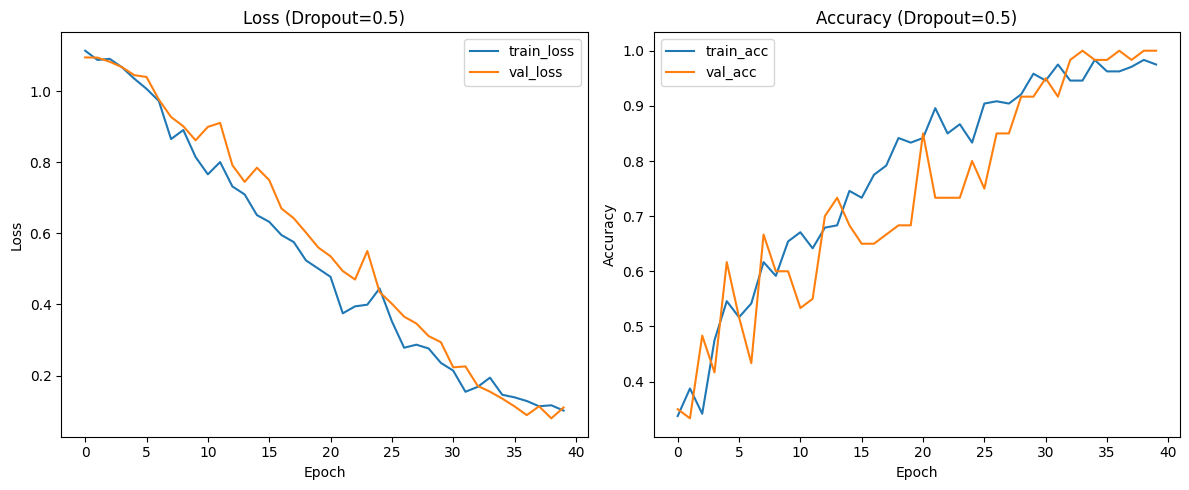

In [33]:
# val_accuracy 기준으로 가장 좋은 dropout 값 찾기
best_dr = max(results, key=lambda d: results[d][1])
print(f"\n가장 성능 좋은 Dropout = {best_dr}, 성능 = {results[best_dr]}")

best_history = histories[best_dr]
best_model = models[best_dr]

# 학습/검증 loss, accuracy 곡선 그리기
plt.figure(figsize=(12,5))

# Loss
plt.subplot(1,2,1)
plt.plot(best_history.history['loss'], label='train_loss')
plt.plot(best_history.history['val_loss'], label='val_loss')
plt.title(f'Loss (Dropout={best_dr})')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1,2,2)
plt.plot(best_history.history['accuracy'], label='train_acc')
plt.plot(best_history.history['val_accuracy'], label='val_acc')
plt.title(f'Accuracy (Dropout={best_dr})')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [34]:
# 검증 데이터에 대한 예측
y_pred_proba = best_model.predict(x_val)
y_pred = np.argmax(y_pred_proba, axis=1)

# 오분류된 인덱스 찾기
mis_idx = np.where(y_pred != y_val)[0]
print("오분류 개수:", len(mis_idx))

# 오분류가 있으면 랜덤하게 최대 9개만 뽑아서 시각화
if len(mis_idx) > 0:
    n_show = min(9, len(mis_idx))
    sample_idx = np.random.choice(mis_idx, size=n_show, replace=False)

    plt.figure(figsize=(12, 12))
    for i, idx in enumerate(sample_idx):
        plt.subplot(3, 3, i+1)
        plt.imshow(x_val[idx])
        true_label = class_names[int(y_val[idx])]
        pred_label = class_names[int(y_pred[idx])]
        plt.title(f"True: {true_label}\nPred: {pred_label}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("오분류가 없습니다. (현재 검증셋 기준)")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
오분류 개수: 0
오분류가 없습니다. (현재 검증셋 기준)


In [37]:
best_dr = 0.4
best_model = models[best_dr]
best_model.save("rps_best_model.keras")


In [38]:
from tensorflow import keras

save_path = "/content/drive/MyDrive/SQL_modu/1201_DL/rps_best_model.keras"
best_model.save(save_path)
print("모델 저장 완료:", save_path)


모델 저장 완료: /content/drive/MyDrive/SQL_modu/1201_DL/rps_best_model.keras


In [39]:
import numpy as np
import os, glob
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
from tensorflow import keras

# 1) 구글 드라이브 마운트 (콜랩에서만)
from google.colab import drive
drive.mount('/content/drive')

# 2) 저장해둔 모델 불러오기
model_path = "/content/drive/MyDrive/SQL_modu/1201_DL/rps_best_model.keras"
model = keras.models.load_model(model_path)
print("모델 로드 완료:", model_path)

# 3) 라벨 숫자 → 이름 매핑
class_names = ['scissor', 'rock', 'paper']


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
모델 로드 완료: /content/drive/MyDrive/SQL_modu/1201_DL/rps_best_model.keras


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
def preprocess_image(img_path, img_size=28, contrast_factor=1.8):
    """
    단일 이미지 경로 → (1, img_size, img_size, 3) 배열로 변환
    - RGB 변환
    - img_size로 리사이즈
    - 명암(contrast) 강화
    - 0~1 정규화
    """
    img = Image.open(img_path).convert("RGB")
    img = img.resize((img_size, img_size))

    enhancer = ImageEnhance.Contrast(img)
    img = enhancer.enhance(contrast_factor)

    img_arr = np.array(img, dtype=np.float32) / 255.0
    img_arr = np.expand_dims(img_arr, axis=0)  # (H,W,C) → (1,H,W,C)
    return img_arr, img  # 전처리된 배열 + 사람이 볼용 원본 PIL 이미지


def predict_one_image(img_path):
    """
    img_path 한 장에 대해:
    - 전처리
    - 모델 예측
    - 화면에 이미지 + 예측 결과 출력
    """
    x, img_vis = preprocess_image(img_path)
    proba = model.predict(x)[0]       # (3,) 확률 벡터
    pred_idx = np.argmax(proba)
    pred_name = class_names[pred_idx]

    # 결과 출력
    print(f"파일: {img_path}")
    for i, name in enumerate(class_names):
        print(f"  {name}: {proba[i]*100:.2f}%")
    print(f" 예측 결과: {pred_name}\n")

    # 이미지 시각화
    plt.imshow(img_vis)
    plt.title(f"Pred: {pred_name}")
    plt.axis("off")
    plt.show()


In [44]:
!unzip "/content/drive/MyDrive/SQL_modu/1201_DL/test_srp_kaggle.zip" -d "/content/drive/MyDrive/SQL_modu/1201_DL/"


Archive:  /content/drive/MyDrive/SQL_modu/1201_DL/test_srp_kaggle.zip
replace /content/drive/MyDrive/SQL_modu/1201_DL/test_srp_kaggle/paper/paper01-000.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [47]:
# ★★★ 여기만 네 상황에 맞게 바꿔줘 ★★★
friend_dir = "/content/drive/MyDrive/SQL_modu/1201_DL/test_srp_kaggle/"

# jpg, png 다 가져오기
img_files = glob.glob(os.path.join(friend_dir, "*.jpg")) + \
            glob.glob(os.path.join(friend_dir, "*.png"))

print("친구 이미지 개수:", len(img_files))

# 앞에서 만든 함수로 여러 장 예측
for img_path in img_files:
    predict_one_image(img_path)


친구 이미지 개수: 0


In [48]:
import os, glob, random
import numpy as np
from PIL import Image, ImageEnhance

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

random.seed(42)
np.random.seed(42)

def load_mixed_data_with_sampling(base_dirs, per_class=100, img_size=28, contrast_factor=1.8):
    """
    base_dirs = [내_데이터_루트, 친구_데이터_루트]
    각 루트 아래에 scissor / rock / paper 폴더가 있다고 가정.

    각 클래스별로 (여러 base_dir을 모두 합쳐서)
    랜덤으로 최대 per_class개만 뽑아서
    (img_size x img_size x 3) 이미지와 레이블을 반환.
    """
    classes = {
        "scissor": 0,
        "rock":    1,
        "paper":   2,
    }

    file_label_pairs = []

    for cls_name, cls_label in classes.items():
        all_files = []
        # 1) 두 사람(또는 여러 루트)의 파일을 다 모은다
        for base_dir in base_dirs:
            pattern = os.path.join(base_dir, cls_name, "*.jpg")
            all_files.extend(glob.glob(pattern))

        if len(all_files) == 0:
            print(f"[경고] {cls_name} 클래스에 해당하는 파일이 없습니다.")
            continue

        # 2) 섞고, 그 중 최대 per_class개만 사용
        random.shuffle(all_files)
        selected_files = all_files[:min(per_class, len(all_files))]

        print(f"{cls_name} 전체 파일 수: {len(all_files)}, 사용: {len(selected_files)}")

        for f in selected_files:
            file_label_pairs.append((f, cls_label))

    number_of_data = len(file_label_pairs)
    print("총 사용 이미지 수:", number_of_data)

    imgs   = np.zeros((number_of_data, img_size, img_size, 3), dtype=np.float32)
    labels = np.zeros((number_of_data,), dtype=np.int32)

    for idx, (filepath, label) in enumerate(file_label_pairs):
        img = Image.open(filepath).convert("RGB")
        img = img.resize((img_size, img_size))

        # 명암(contrast) 강화
        enhancer = ImageEnhance.Contrast(img)
        img = enhancer.enhance(contrast_factor)

        img_arr = np.array(img, dtype=np.float32) / 255.0
        imgs[idx] = img_arr
        labels[idx] = label

    return imgs, labels


In [49]:
# ★ 여기만 실제 경로에 맞게 바꿔주면 됨
my_base_dir      = "/content/drive/MyDrive/SQL_modu/1201_DL"
friend_base_dir  = "/content/drive/MyDrive/SQL_modu/1201_DL/test_srp_kaggle"

base_dirs = [my_base_dir, friend_base_dir]

x_data, y_data = load_mixed_data_with_sampling(
    base_dirs=base_dirs,
    per_class=100,      # 클래스당 100장
    img_size=28,
    contrast_factor=1.8
)

print("x_data shape:", x_data.shape)
print("y_data shape:", y_data.shape)

# 학습/검증 분할
x_train, x_val, y_train, y_val = train_test_split(
    x_data, y_data,
    test_size=0.2,
    random_state=42,
    stratify=y_data
)

print("x_train:", x_train.shape, "y_train:", y_train.shape)
print("x_val:", x_val.shape, "y_val:", y_val.shape)


scissor 전체 파일 수: 145, 사용: 100
rock 전체 파일 수: 101, 사용: 100
paper 전체 파일 수: 103, 사용: 100
총 사용 이미지 수: 300
x_data shape: (300, 28, 28, 3)
y_data shape: (300,)
x_train: (240, 28, 28, 3) y_train: (240,)
x_val: (60, 28, 28, 3) y_val: (60,)


In [50]:
def build_model(dropout_rate=0.4):
    model = keras.models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(3, activation='softmax')
    ])
    return model

model = build_model(dropout_rate=0.4)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

history = model.fit(
    x_train, y_train,
    epochs=40,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=[early_stop],
    verbose=2
)

val_loss, val_acc = model.evaluate(x_val, y_val, verbose=0)
print(f"최종 검증 Loss: {val_loss:.4f}, 검증 Accuracy: {val_acc:.4f}")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
8/8 - 3s - 409ms/step - accuracy: 0.3417 - loss: 1.1308 - val_accuracy: 0.3333 - val_loss: 1.0980
Epoch 2/40
8/8 - 0s - 38ms/step - accuracy: 0.3458 - loss: 1.1266 - val_accuracy: 0.5000 - val_loss: 1.0831
Epoch 3/40
8/8 - 0s - 39ms/step - accuracy: 0.4417 - loss: 1.0726 - val_accuracy: 0.6167 - val_loss: 1.0676
Epoch 4/40
8/8 - 0s - 38ms/step - accuracy: 0.4625 - loss: 1.0508 - val_accuracy: 0.4833 - val_loss: 1.0395
Epoch 5/40
8/8 - 0s - 39ms/step - accuracy: 0.5583 - loss: 1.0138 - val_accuracy: 0.5000 - val_loss: 1.0041
Epoch 6/40
8/8 - 0s - 40ms/step - accuracy: 0.5792 - loss: 0.9640 - val_accuracy: 0.6167 - val_loss: 0.9559
Epoch 7/40
8/8 - 1s - 76ms/step - accuracy: 0.6042 - loss: 0.9042 - val_accuracy: 0.5167 - val_loss: 0.9159
Epoch 8/40
8/8 - 0s - 37ms/step - accuracy: 0.6167 - loss: 0.8691 - val_accuracy: 0.5167 - val_loss: 0.9033
Epoch 9/40
8/8 - 0s - 42ms/step - accuracy: 0.6167 - loss: 0.8331 - val_accuracy: 0.6833 - val_loss: 0.8393
Epoch 10/40
8/8 - 0s - 37ms